# DarkELF multiphonon notebook

This notebook is meant to illustrate the part of the darkELF package for calculating dark matter-phonon rates in the multiphonon regime.

written by Ethan, updated 02/08/2021

In [1]:
%matplotlib inline

import sys, os
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.ticker
from matplotlib import rc, rcParams
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
import time
import pandas
from scipy import interpolate

# Make use of TeX\ufeff
rc('text',usetex=True)
# Change all fonts to 'Computer Modern'
rc('font',**{'size':14, 'family':'serif','serif':['Times New Roman']})
rc('xtick.major', size=5, pad=7)
rc('xtick', labelsize=15)
rc('ytick.major', size=5, pad=7)
rc('ytick', labelsize=15)

# this needs to point to the folder where darkelf.py is stored
work_dir = os.getcwd()
sys.path.append(work_dir+"/..")
plotdir=work_dir+"/plots/"

# load the package
from darkelf import darkelf, targets

## Load the materials

When loading the materials, the "dos_filename" flag must be set in order to calculate rates in the multiphonon regime. The "target_yaml" flag is set automatically and can be overridden. Auxiliary functions "Fn" are pre-tabulated corresponding to the given density of states files and loaded in by default. If using another density of states, one must first run the "create_Fn_omega()" function on the desired density of states.

In [2]:
targets.files('Si')


Available configuration files: 
	 Si.yaml
 
Available data for epsilon: 
	 Si_Migdal_FAC.dat
	 Si_atomic_Z_eps_form_factor.dat
	 Si_mermin.dat
	 Si_gpaw_noLFE.dat
	 Si_gpaw_withLFE.dat
	 Si_epsphonon_theory6K.dat
	 Si_epsphonon_data6K.dat
	 Si_Zion.dat
 
Available data for phonon density of states: 
	 Si_DoS.dat
 
Available data for Fn(omega) functions: 
	 Si_Fn.dat
 
Available data for form factors: 
	 Si_atomic_Z_eps_form_factor.dat


If one is only interested in the multiphonon response, the electronic response specified with the "filename" flag is not used. If it is not specified, the code will produce a warning message, as seen below. There's also an optional form_factor_filename if one is interested in using a custom DM-atomic form factor. These can be ignored as long as we only care about DM-multiphonon scattering. Let's load a few materials.

In [3]:
gaas = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")
si = darkelf(target='Si',dos_filename="Si_DoS.dat")
c = darkelf(target='C',dos_filename="C_DoS.dat")

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filen

# Cross section plots

Now using the sigma_nucleon function to calculate the required DM-nucleon cross-section for a rate of 3 events/kg/yr

In [ ]:
import seaborn as sns

points = 40

mdm = np.logspace(4, 9, points)

reaches1 = np.zeros(points)
reaches2 = np.zeros(points)
reaches3 = np.zeros(points)

import time

for i, mass in enumerate(mdm):
    gaas.update_params(mX = mass, mMed = 0) # update the DM mass
    if (i % 5) == 0:
        start = time.time()
    reaches1[i] = gaas.sigma_multiphonons(1e-3)
    reaches2[i] = gaas.sigma_multiphonons(1e-1)
    reaches3[i] = gaas.sigma_multiphonons(1)

    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()


ax.plot(mdm/1e6, reaches1, label='$1$ meV', color=colors[0])
ax.plot(mdm/1e6, reaches2, label='$100$ meV', color=colors[1])
ax.plot(mdm/1e6, reaches3, label='$1$ eV', color=colors[2])


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr GaAs, Massless Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.savefig(plotdir+"gaas_massless_multiphonon.pdf",bbox_inches='tight')


0
1
2


/Users/ethanvillarama/Documents/GitHub/DarkELF/examples/../darkelf/multiphonon_generalized.py:340: RuntimeWarning: invalid value encountered in sqrt
  qmin = self.mX*(self.vmax - sqrt(self.vmax**2 - 2*self.LOvec[0]/self.mX))
/Users/ethanvillarama/Documents/GitHub/DarkELF/examples/../darkelf/multiphonon_generalized.py:341: RuntimeWarning: invalid value encountered in sqrt
  qmax = min(self.qBZ, self.mX*(self.vmax + sqrt(self.vmax**2 - 2*self.LOvec[0]/self.mX)))


3
4
Points 0 to 4 took 4.39237904548645 seconds to calculate
5
6
7
8
9
Points 5 to 9 took 62.3057279586792 seconds to calculate
10
11
12
13
14
Points 10 to 14 took 106.56738686561584 seconds to calculate
15


If starting with a new density of states, one must run the 'create_Fn_omega()' function. This defaults to creating the Fn functions corresponding to the density of states loaded in in the instantiation of the class. This can take an hour or two.

# Differential Rate $\frac{dR}{d\omega}$

We can calculate the differential rate as a function of the incoming dark matter mass using the function 'dR_domega_multiphonons' (defaults to coupling with mass number and $\sigma_n = 10^{-38} \mathrm{cm}^2$). Note that the single optical phonon response in the long wavelength regime we model as a Gaussian with width 0.5 meV

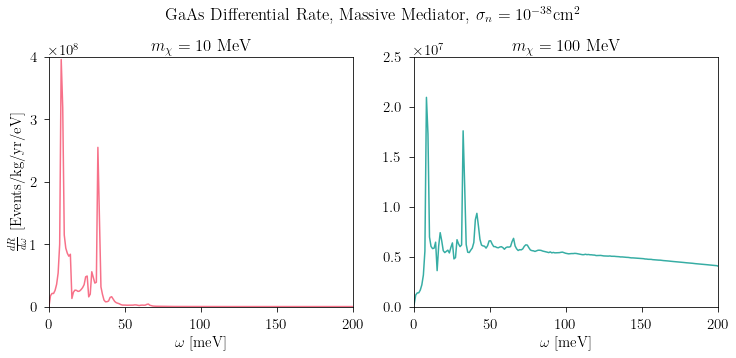

In [6]:
import seaborn as sns

mdm1 = 1e7
mdm2 = 1e8

omegarange = np.linspace(1e-4, 200e-3, 200)

dr_domega1 = [gaas.dRdomega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange]
dr_domega2 = [gaas.dRdomega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 10$ MeV')
ax2.set_title(r'$m_\chi = 100$ MeV')

ax1.set_xlim([0,200])
ax2.set_xlim([0,200])

ax1.set_ylim([0,4e8])
ax2.set_ylim([0,2.5e7])


xtick_major = [50*n for n in range(5)]
ytick_major = [1e8*n for n in range(5)]
ax1.set_yticks(ytick_major)

ax1.set_xticks(xtick_major)
ax2.set_xticks(xtick_major)

ytick_major = [0.5e7*n for n in range(6)]
ax2.set_yticks(ytick_major)

plt.suptitle(r'GaAs Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.savefig(plotdir+"gaas_massive_rates.pdf",bbox_inches='tight')

# Custom Atomic Form Factor

Here we calculate the cross-section for a rate of 3 events/kg/yr for a dark photon, using a custom atomic form factor. In order to do this, the form factor must be loaded in at the instantiation of the class via 'form_factor_filename' and the flag 'custom_form_factor' must be set to 'True' in function calls. Note that the default coupling without a custom form factor is the mass number, setting 'custom_form_factor' to 'True' removes the mass number coupling.

In [ ]:
import seaborn as sns

# Loads dark photon form factor 
si = darkelf(target='Si',dos_filename="Si_DoS.dat",
             form_factor_filename='Si_atomic_Z_eps_form_factor.dat')

points = 40

mdm = np.logspace(4, 9, points)

reaches1 = np.zeros(points)
reaches2 = np.zeros(points)
reaches3 = np.zeros(points)


import time

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    reaches1[i] = si.sigma_multiphonons(mass, 20e-3, custom_form_factor=True)
    reaches2[i] = si.sigma_multiphonons(mass, 80e-3, custom_form_factor=True)
    reaches3[i] = si.sigma_multiphonons(mass, 200e-3, custom_form_factor=True)

    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, reaches1, label='$20$ meV', color=colors[0])
ax.plot(mdm/1e6, reaches2, label='$80$ meV', color=colors[1])
ax.plot(mdm/1e6, reaches3, label='$200$ meV', color=colors[2])

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-43,1e-37])

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_p \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-43,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.set_title(r'kg-yr Si, Dark Photon')

ax.legend(loc=(0.03,0.01),fontsize=8,frameon=False,ncol=2,title="Threshold Energy",)

plt.savefig(plotdir+"si_dark_photon.pdf",bbox_inches='tight')


 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Loaded Si_atomic_Z_eps_form_factor.dat for form factor
Points 0 to 4 took 13.150466203689575 seconds to calculate


In [5]:
import time
start = time.time()
gaas.sigma_nucleon(1e8, 1e-3, mediator='massless')
end = time.time()
print(end-start)

10.159884929656982


In [5]:
gaas.sigma_nucleon(1e9, 1e-3, mediator='massless')

3.103514255511155e-47

In [6]:
gaas.sigma_nucleon(1e8, 1e-3, mediator='massless')

1.0990056038625188e-45

In [7]:
gaas.sigma_nucleon(1e9, 1e-3, mediator='massless')

3.112057828453959e-47

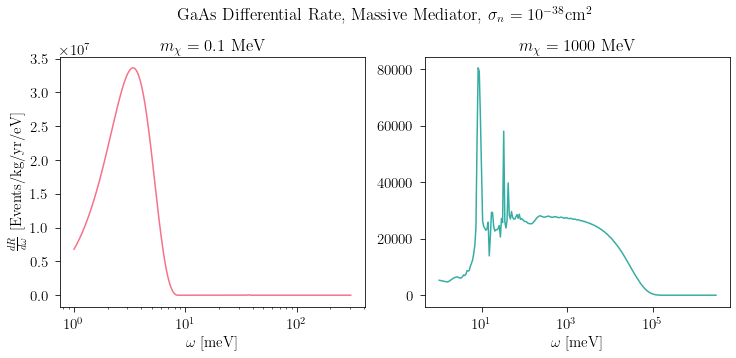

In [49]:
import seaborn as sns

mdm1 = 1e5
mdm2 = 1e9

omegarange1 = np.logspace(np.log10(1e-3), np.log10((1/2)*1e5*(gaas.vesc + gaas.veavg)**2), 500)
omegarange2 = np.logspace(np.log10(1e-3), np.log10((1/2)*1e9*(gaas.vesc + gaas.veavg)**2), 250)

dr_domega1 = [gaas.dR_domega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange1]
dr_domega2 = [gaas.dR_domega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange2]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange1*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange2*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 0.1$ MeV')
ax2.set_title(r'$m_\chi = 1000$ MeV')

#ax1.set_xlim([0,200])
#ax2.set_xlim([0,200])

#ax1.set_ylim([0,4e8])
#ax2.set_ylim([0,2.5e7])

ax1.set_xscale('log')
ax2.set_xscale('log')

#xtick_major = [50*n for n in range(5)]
#ytick_major = [1e8*n for n in range(5)]
#ax1.set_yticks(ytick_major)

#ax1.set_xticks(xtick_major)
#ax2.set_xticks(xtick_major)

#ytick_major = [0.5e7*n for n in range(6)]
#ax2.set_yticks(ytick_major)

plt.suptitle(r'GaAs Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.show()

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filen

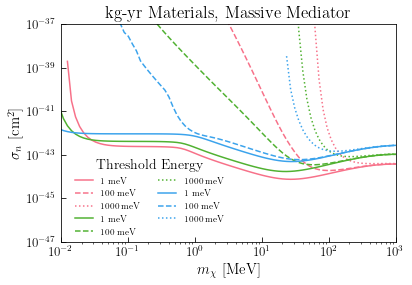

In [4]:
gaas = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")
si = darkelf(target='Si',dos_filename="Si_DoS.dat")
c = darkelf(target='C',dos_filename="C_DoS.dat")

import seaborn as sns

# Loads dark photon form factor 

points = 100

mdm = np.logspace(3, 9, points)

gaas_reaches1 = np.zeros(points)
si_reaches1 = np.zeros(points)
diamond_reaches1 = np.zeros(points)
gaas_reaches2 = np.zeros(points)
si_reaches2 = np.zeros(points)
diamond_reaches2 = np.zeros(points)
gaas_reaches3 = np.zeros(points)
si_reaches3 = np.zeros(points)
diamond_reaches3 = np.zeros(points)

import time

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    si_reaches1[i] = si.sigma_multiphonons(mass, 1e-3, mediator='massive')
    si_reaches2[i] = si.sigma_multiphonons(mass, 100e-3, mediator='massive')
    si_reaches3[i] = si.sigma_multiphonons(mass, 1000e-3, mediator='massive')
    diamond_reaches1[i] = c.sigma_multiphonons(mass, 1e-3, mediator='massive')
    diamond_reaches2[i] = c.sigma_multiphonons(mass, 100e-3, mediator='massive')
    diamond_reaches3[i] = c.sigma_multiphonons(mass, 1000e-3, mediator='massive')
    gaas_reaches1[i] = gaas.sigma_multiphonons(mass, 1e-3, mediator='massive')
    gaas_reaches2[i] = gaas.sigma_multiphonons(mass, 100e-3, mediator='massive')
    gaas_reaches3[i] = gaas.sigma_multiphonons(mass, 1000e-3, mediator='massive')

    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, gaas_reaches1, label='$1$ meV', color=colors[0])
ax.plot(mdm/1e6, gaas_reaches2, label='$100$ meV', color=colors[0],linestyle='--')
ax.plot(mdm/1e6, gaas_reaches3, label='$1000$ meV', color=colors[0],linestyle=':')

ax.plot(mdm/1e6, si_reaches1, label='$1$ meV', color=colors[1])
ax.plot(mdm/1e6, si_reaches2, label='$100$ meV', color=colors[1],linestyle='--')
ax.plot(mdm/1e6, si_reaches3, label='$1000$ meV', color=colors[1],linestyle=':')

ax.plot(mdm/1e6, diamond_reaches1, label='$1$ meV', color=colors[2])
ax.plot(mdm/1e6, diamond_reaches2, label='$100$ meV', color=colors[2],linestyle='--')
ax.plot(mdm/1e6, diamond_reaches3, label='$1000$ meV', color=colors[2],linestyle=':')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Materials, Massive Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.savefig(plotdir+"materials_Massive_mediator.pdf",bbox_inches='tight')


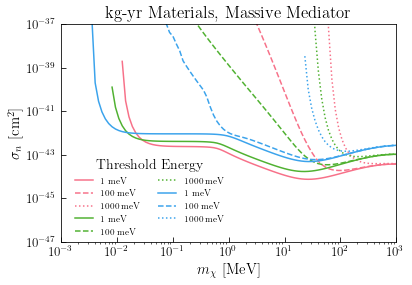

In [6]:
fig, ax = plt.subplots()

ax.plot(mdm/1e6, gaas_reaches1, label='$1$ meV', color=colors[0])
ax.plot(mdm/1e6, gaas_reaches2, label='$100$ meV', color=colors[0],linestyle='--')
ax.plot(mdm/1e6, gaas_reaches3, label='$1000$ meV', color=colors[0],linestyle=':')

ax.plot(mdm/1e6, si_reaches1, label='$1$ meV', color=colors[1])
ax.plot(mdm/1e6, si_reaches2, label='$100$ meV', color=colors[1],linestyle='--')
ax.plot(mdm/1e6, si_reaches3, label='$1000$ meV', color=colors[1],linestyle=':')

ax.plot(mdm/1e6, diamond_reaches1, label='$1$ meV', color=colors[2])
ax.plot(mdm/1e6, diamond_reaches2, label='$100$ meV', color=colors[2],linestyle='--')
ax.plot(mdm/1e6, diamond_reaches3, label='$1000$ meV', color=colors[2],linestyle=':')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Materials, Massive Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-3,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.savefig(plotdir+"materials_massive_mediator.pdf",bbox_inches='tight')


In [7]:
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/si/si_reaches_massive_1meV.txt',
                  np.stack((mdm, si_reaches1),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/si/si_reaches_massive_100meV.txt',
                  np.stack((mdm, si_reaches2),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/si/si_reaches_massive_1eV.txt',
                  np.stack((mdm, si_reaches3),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massive_1meV.txt',
                  np.stack((mdm, diamond_reaches1),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massive_100meV.txt',
                  np.stack((mdm, diamond_reaches2),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massive_1eV.txt',
                  np.stack((mdm, diamond_reaches3),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/gaas/gaas_reaches_massive_1meV.txt',
                  np.stack((mdm, gaas_reaches1),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/gaas/gaas_reaches_massive_100meV.txt',
                  np.stack((mdm, gaas_reaches2),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/gaas/gaas_reaches_massive_1eV.txt',
                  np.stack((mdm, gaas_reaches3),axis=0).T)



In [30]:
np.stack((mdm, diamond_reaches1),axis=0).T

array([[1.00000000e+03,            inf],
       [1.14975700e+03,            inf],
       [1.32194115e+03,            inf],
       [1.51991108e+03,            inf],
       [1.74752840e+03,            inf],
       [2.00923300e+03,            inf],
       [2.31012970e+03,            inf],
       [2.65608778e+03,            inf],
       [3.05385551e+03,            inf],
       [3.51119173e+03, 2.22231888e-37],
       [4.03701726e+03, 2.04075012e-40],
       [4.64158883e+03, 2.91026463e-41],
       [5.33669923e+03, 9.44562915e-42],
       [6.13590727e+03, 4.52856119e-42],
       [7.05480231e+03, 2.74909473e-42],
       [8.11130831e+03, 1.95040829e-42],
       [9.32603347e+03, 1.53923076e-42],
       [1.07226722e+04, 1.30752142e-42],
       [1.23284674e+04, 1.16887994e-42],
       [1.41747416e+04, 1.08259468e-42],
       [1.62975083e+04, 1.02749886e-42],
       [1.87381742e+04, 9.91739790e-43],
       [2.15443469e+04, 9.68297282e-43],
       [2.47707636e+04, 9.52838895e-43],
       [2.848035

In [37]:
(2*pi/gaas.lattice_spacing)*gaas.eVtoA0

2194.332964270223

In [17]:
plotdir+"materials_massive_mediator.pdf"

'/Users/ethanvillarama/Documents/GitHub/DarkELF/examples/plots/materials_massive_mediator.pdf'

In [38]:
2e-3*1e6

2000.0

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded C_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  C_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
Points 0 to 4 took 0.03034496307373047 seconds to calculate
Points 5 to 9 took 0.02999401092529297 seconds to calculate
Points 10 to 14 took 0.028229951858520

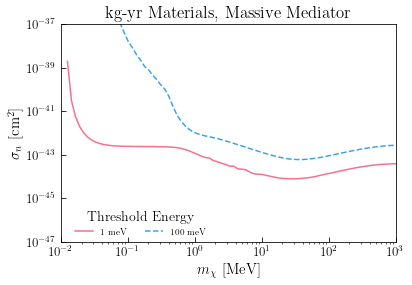

In [11]:
gaas = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")
c = darkelf(target='C',dos_filename="C_DoS.dat")

import seaborn as sns

# Loads dark photon form factor 

points = 100

mdm = np.logspace(3, 9, points)

gaas_reaches1 = np.zeros(points)

diamond_reaches2 = np.zeros(points)

import time

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    diamond_reaches2[i] = c.sigma_nucleon(mass, 100e-3, mediator='massive')
    gaas_reaches1[i] = gaas.sigma_nucleon(mass, 1e-3, mediator='massive')


    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, gaas_reaches1, label='$1$ meV', color=colors[0])

ax.plot(mdm/1e6, diamond_reaches2, label='$100$ meV', color=colors[2],linestyle='--')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Materials, Massive Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()


In [3]:
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v3/gaas/gaas_reaches_massive_1meV.txt',
                  np.stack((mdm, gaas_reaches1),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v3/c/c_reaches_massive_100meV.txt',
                  np.stack((mdm, diamond_reaches2),axis=0).T)


 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded C_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  C_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
Points 0 to 4 took 41.14494490623474 seconds to calculate
Points 5 to 9 took 40.201112031936646 seconds to calculate
Points 10 to 14 took 36.28089904785156 seconds to calculate


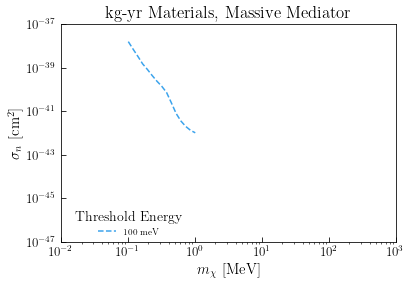

In [7]:
c = darkelf(target='C',dos_filename="C_DoS.dat")

import seaborn as sns

# Loads dark photon form factor 

points = 15

mdm = np.logspace(5, 6, points)

diamond_reaches2 = np.zeros(points)

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    diamond_reaches2[i] = c.sigma_nucleon(mass, 100e-3, mediator='massive')
    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, diamond_reaches2, label='$100$ meV', color=colors[2],linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Materials, Massive Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()


In [4]:
 c.sigma_nucleon(1e5, 100e-3, mediator='massive')

3.718596116784942e-38

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 


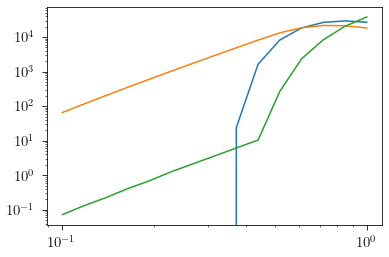

In [44]:
c = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")

omegathreshold = 30e-3

points = 15
mdm = np.logspace(5, 6, points)
rates_acoustic = np.zeros(points)
rates_optical = np.zeros(points)
rates_multiphonon = np.zeros(points)



for i, mass in enumerate(mdm):
    reduced_mass = mass*c.mp/(mass + c.mp)
    prefactor1 = ((1/(c.A*c.mp + c.A*c.mp))*(c.rhoX*c.eVcm**3)/(2*mass*(reduced_mass)**2))
    prefactor2 = 1e-38*((1/c.eVcm)**2)*(c.eVtoInvYr/c.eVtokg)

    rates_acoustic[i] = prefactor1*prefactor2*c.R_coherent_acoustic(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_optical[i] = prefactor1*prefactor2*c.R_coherent_optical(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_multiphonon[i] = c.R_multiphonons_no_single(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    
plt.plot(mdm/1e6, rates_acoustic)
plt.plot(mdm/1e6, rates_optical)
plt.plot(mdm/1e6, rates_multiphonon)
plt.xscale('log')
plt.yscale('log')
plt.show()

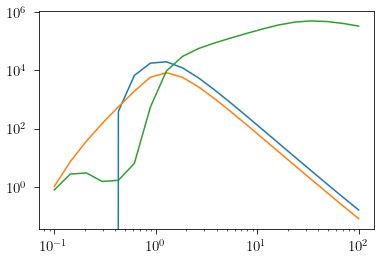

In [3]:
plt.plot(mdm/1e6, rates_acoustic)
plt.plot(mdm/1e6, rates_optical)
plt.plot(mdm/1e6, rates_multiphonon)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [15]:
mdm = 1e6
vmax = c.vesc + c.veavg

print(mdm*vmax**2/2)

3.0464358534748075


In [4]:
c = darkelf(target='C',dos_filename="C_DoS.dat")

c.dR_dq_coherent_optical(1e7, 1e4,
                                     mediator='massive', custom_form_factor=False)

 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded C_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  C_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 


0

In [9]:
qBZ = (2*pi/c.lattice_spacing)*c.eVtoA0

vmax = c.vesc + c.veavg


qmin = mdm*(vmax - np.sqrt(vmax**2 - 2*c.LOvec[0]/mdm))
qmax = min(qBZ, mdm*(vmax + np.sqrt(vmax**2 - 2*c.LOvec[0]/mdm)))

print(qmin, qmax)


65.37471507651539 428.3001458167497


In [18]:
c.etav(1e2/(2*1e5) + c.LOvec[0]/1e2)

17.6499999664447

In [19]:
optical_factor1 = ((c.lattice_spacing/c.eVtoA0)**2/(32*c.LOvec[0]*c.mp))
optical_factor2 = (c.A*c.A)/(c.A + c.A)

print((1e2)**5*optical_factor1*optical_factor2)

4.6637965994631034e-05


In [20]:
x = (1/(2*c.mp*c.A))*c.omega_inverse_bar
if (x*1e2**2 < 0.03):
    debye_waller = 1
else:
    debye_waller = exp(-x*1e2**2)
    
print(debye_waller)

1


NameError: name 'q' is not defined

In [25]:
qBZ = (2*pi/c.lattice_spacing)*c.eVtoA0
vmax = c.vesc + c.veavg

print(min(2*1e8*c.cLA*(vmax - c.cLA), c.cLA*qBZ))

0.03806143586909434


In [20]:
2*1e8*c.cLA*(vmax - c.cLA)

28.920000256945652

In [22]:
c.cLA*qBZ

0.20851368389823827

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


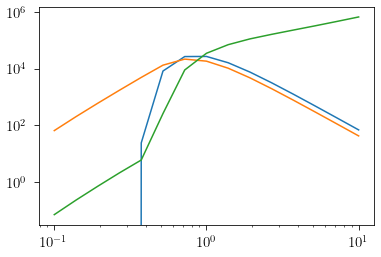

In [13]:
c = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")

omegathreshold = 30e-3

points = 15
mdm = np.logspace(5, 7, points)
rates_acoustic = np.zeros(points)
rates_optical = np.zeros(points)
rates_multiphonon = np.zeros(points)



for i, mass in enumerate(mdm):
    reduced_mass = mass*c.mp/(mass + c.mp)
    prefactor1 = ((1/(c.A*c.mp + c.A*c.mp))*(c.rhoX*c.eVcm**3)/(2*mass*(reduced_mass)**2))
    prefactor2 = 1e-38*((1/c.eVcm)**2)*(c.eVtoInvYr/c.eVtokg)

    rates_acoustic[i] = prefactor1*prefactor2*c.R_coherent_acoustic(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_optical[i] = prefactor1*prefactor2*c.R_coherent_optical(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_multiphonon[i] = c.R_multiphonons_no_single(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    print(i)
    
plt.plot(mdm/1e6, rates_acoustic)
plt.plot(mdm/1e6, rates_optical)
plt.plot(mdm/1e6, rates_multiphonon)
plt.xscale('log')
plt.yscale('log')
plt.show()

 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded C_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  C_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
Points 0 to 4 took 9.799003601074219e-05 seconds to calculate
Points 5 to 9 took 10.915072917938232 seconds to calculate
Points 10 to 14 took 46.403055906295776 seconds to calculate
Points 15 to 19 took 48.96850109100342 seconds to calculate


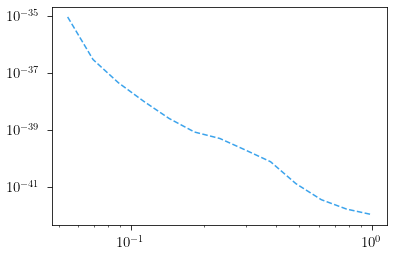

In [8]:
c = darkelf(target='C',dos_filename="C_DoS.dat")

import seaborn as sns

# Loads dark photon form factor 

points = 20

mdm = np.logspace(4, 6, points)

diamond_reaches2 = np.zeros(points)

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    diamond_reaches2[i] = c.sigma_multiphonons(mass, 100e-3, mediator='massive')
    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, diamond_reaches2, label='$100$ meV', color=colors[2],linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')

#ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
#ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

#ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

#ax.set_title(r'kg-yr GaAs, Massive Mediator')

#ax.set_xlim([1e1,1e3])
#ax.set_ylim([1e-44,1e-37])

#xtick_major = [pow(10.,n) for n in range(-2,4,1)]
#ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
#ax.set_yticks(ytick_major)
#ax.set_xticks(xtick_major)

#ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()


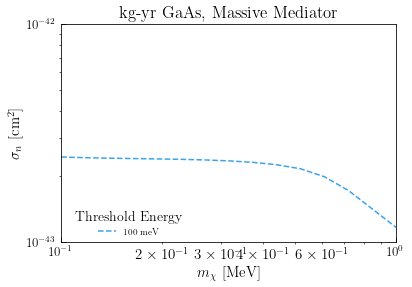

In [10]:
fig, ax = plt.subplots()

ax.plot(mdm/1e6, diamond_reaches2, label='$100$ meV', color=colors[2],linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr GaAs, Massive Mediator')

ax.set_xlim([1e-1,1e0])
ax.set_ylim([1e-43,1e-42])

#xtick_major = [pow(10.,n) for n in range(-2,4,1)]
#ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
#ax.set_yticks(ytick_major)
#ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()

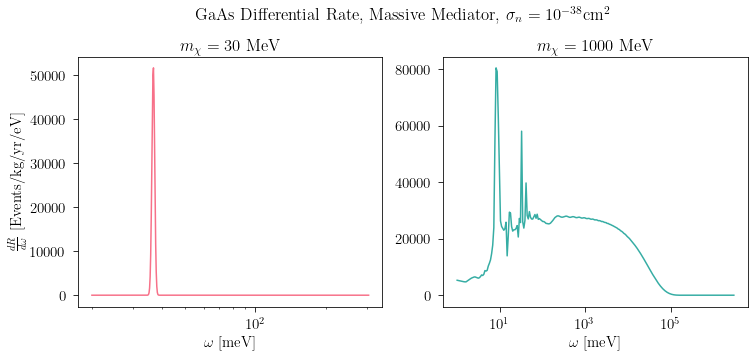

In [24]:
gaas.dR_domega_dq_coherent_single(1e5, 1e2, 31e-3)

7.9091818447628815e-25

In [45]:
gaas.dR_domega_multiphonons(1e5, 33.6e-3, mediator='massive')

0.0008278409850999827

In [46]:
gaas.dR_domega_multiphonons(1e5, 3e-3, mediator='massive')

32622907.283911087

In [34]:
omegarange1 = np.logspace(np.log10(1e-3), np.log10((1/2)*1e5*(gaas.vesc + gaas.veavg)**2), 500)


[0.001      0.00101153 0.00102319 0.00103498 0.00104691 0.00105898
 0.00107119 0.00108353 0.00109602 0.00110866 0.00112144 0.00113437
 0.00114744 0.00116067 0.00117405 0.00118758 0.00120127 0.00121512
 0.00122912 0.00124329 0.00125762 0.00127212 0.00128678 0.00130162
 0.00131662 0.0013318  0.00134715 0.00136268 0.00137839 0.00139428
 0.00141035 0.0014266  0.00144305 0.00145968 0.00147651 0.00149353
 0.00151075 0.00152816 0.00154578 0.00156359 0.00158162 0.00159985
 0.00161829 0.00163695 0.00165581 0.0016749  0.00169421 0.00171374
 0.00173349 0.00175347 0.00177369 0.00179413 0.00181481 0.00183573
 0.00185689 0.0018783  0.00189995 0.00192185 0.001944   0.00196641
 0.00198908 0.00201201 0.0020352  0.00205866 0.00208239 0.0021064
 0.00213068 0.00215524 0.00218008 0.00220521 0.00223063 0.00225634
 0.00228235 0.00230866 0.00233527 0.00236219 0.00238942 0.00241697
 0.00244483 0.00247301 0.00250152 0.00253035 0.00255952 0.00258902
 0.00261887 0.00264905 0.00267959 0.00271048 0.00274172 0.00277

In [50]:
dr_domega1

[6798719.821323211,
 6944592.962580689,
 7093315.9700218765,
 7244931.059153752,
 7399480.375639431,
 7557005.949322073,
 7717549.645446946,
 7881153.112960393,
 8047857.72976073,
 8217704.5447725495,
 8390734.216712233,
 8566986.949409006,
 8746502.42354222,
 8929319.724652259,
 9115477.267278992,
 9305012.715078482,
 9497962.896765748,
 9694363.717727937,
 9894250.067150261,
 10097655.720493816,
 10304613.237162616,
 10515153.853194948,
 10729307.368812673,
 10947102.03066075,
 11168564.408568485,
 11393719.266663626,
 11622589.42867064,
 11855195.637225244,
 12091556.407038804,
 12331687.8717481,
 12575603.624289291,
 12823314.550638419,
 13074828.656765724,
 13330150.888656827,
 13589282.945260832,
 13852223.084233612,
 14118965.920354038,
 14389502.216502061,
 14663818.667099984,
 14941897.67393279,
 15223717.114279244,
 15509250.101303915,
 15798464.736680288,
 16091323.855437808,
 16387784.763050303,
 16687798.964811424,
 16991311.887572344,
 17298262.593950685,
 17608583.489155

In [75]:
import seaborn as sns

mdm1 = 1e6
mdm2 = 3e6
mdm3 = 6e6
mdm4 = 1e7

omegarange = np.linspace(1e-4, 200e-3, 500)

dr_domega1 = [c.dR_domega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange]
dr_domega2 = [c.dR_domega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange]
dr_domega3 = [c.dR_domega_multiphonons(mdm3, omega, mediator='massive') for omega in omegarange]
dr_domega4 = [c.dR_domega_multiphonons(mdm4, omega, mediator='massive') for omega in omegarange]

colors = sns.color_palette("husl", 4)


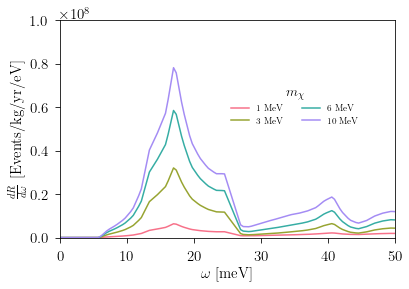

In [78]:
fig, ax1 = plt.subplots()

ax1.plot(omegarange*1e3, dr_domega1, color=colors[0],label=r'$1$ MeV')
ax1.plot(omegarange*1e3, dr_domega2, color=colors[1],label=r'$3$ MeV')
ax1.plot(omegarange*1e3, dr_domega3, color=colors[2],label=r'$6$ MeV')
ax1.plot(omegarange*1e3, dr_domega4, color=colors[3],label=r'$10$ MeV')


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


#ax1.set_title(r'$m_\chi = 10$ MeV')

ax1.set_xlim([0,50])

ax1.set_ylim([0,1e8])


xtick_major = [10*n for n in range(6)]
#ytick_major = [0e8*n for n in range(5)]
#ax1.set_yticks(ytick_major)

ax1.set_xticks(xtick_major)

ax1.legend(loc=(0.50,0.50),fontsize=9,frameon=False,ncol=2,title=r'$m_\chi$')

plt.show()


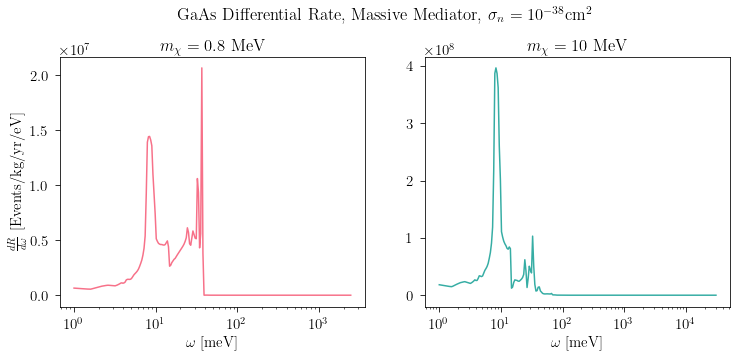

In [70]:
import seaborn as sns

mdm1 = 0.8e6
mdm2 = 1e7

omegarange1 = np.logspace(np.log10(1e-3), np.log10((1/2)*mdm1*(gaas.vesc + gaas.veavg)**2), 250)
omegarange2 = np.logspace(np.log10(1e-3), np.log10((1/2)*mdm2*(gaas.vesc + gaas.veavg)**2), 250)

dr_domega1 = [gaas.dR_domega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange1]
dr_domega2 = [gaas.dR_domega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange2]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange1*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange2*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 0.8$ MeV')
ax2.set_title(r'$m_\chi = 10$ MeV')

#ax1.set_xlim([0,200])
#ax2.set_xlim([0,200])

#ax1.set_ylim([0,4e8])
#ax2.set_ylim([0,2.5e7])

ax1.set_xscale('log')
ax2.set_xscale('log')

#xtick_major = [50*n for n in range(5)]
#ytick_major = [1e8*n for n in range(5)]
#ax1.set_yticks(ytick_major)

#ax1.set_xticks(xtick_major)
#ax2.set_xticks(xtick_major)

#ytick_major = [0.5e7*n for n in range(6)]
#ax2.set_yticks(ytick_major)

plt.suptitle(r'GaAs Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.show()

In [66]:
qBZ = (2*pi/gaas.lattice_spacing)*gaas.eVtoA0
print(qBZ)

2194.332964270223


In [67]:
1e6*2e-3

2000.0

In [73]:
c = darkelf(target='Si',dos_filename="Si_DoS.dat")

import seaborn as sns

# Loads dark photon form factor 

points = 15

mdm = np.logspace(6, 7, points)

gaas_reaches_1 = np.zeros(points)
gaas_reaches_2 = np.zeros(points)


for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    gaas_reaches_1[i] = c.sigma_nucleon(mass, 1e-3, mediator='massive')
    gaas_reaches_2[i] = c.sigma_nucleon(mass, 20e-3, mediator='massive')
    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 3)

 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
Points 0 to 4 took 59.67399287223816 seconds to calculate
Points 5 to 9 took 59.43110394477844 seconds to calculate
Points 10 to 14 took 53.031084060668945 seconds to calculate


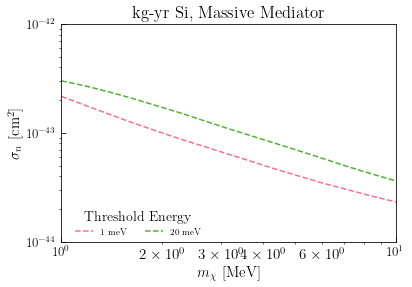

In [74]:
fig, ax = plt.subplots()

ax.plot(mdm/1e6, gaas_reaches_1, label='$1$ meV', color=colors[0],linestyle='--')
ax.plot(mdm/1e6, gaas_reaches_2, label='$20$ meV', color=colors[1],linestyle='--')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Si, Massive Mediator')

ax.set_xlim([1e0,1e1])
ax.set_ylim([1e-44,1e-42])

#xtick_major = [pow(10.,n) for n in range(-2,4,1)]
#ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
#ax.set_yticks(ytick_major)
#ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()


 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


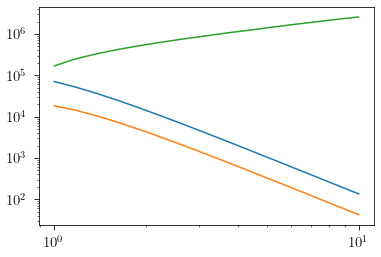

In [3]:
c = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")

omegathreshold = 1e-3

points = 15
mdm = np.logspace(6, 7, points)
rates_acoustic = np.zeros(points)
rates_optical = np.zeros(points)
rates_multiphonon = np.zeros(points)



for i, mass in enumerate(mdm):
    reduced_mass = mass*c.mp/(mass + c.mp)
    prefactor1 = ((1/(c.A*c.mp + c.A*c.mp))*(c.rhoX*c.eVcm**3)/(2*mass*(reduced_mass)**2))
    prefactor2 = 1e-38*((1/c.eVcm)**2)*(c.eVtoInvYr/c.eVtokg)

    rates_acoustic[i] = prefactor1*prefactor2*c.R_coherent_acoustic(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_optical[i] = prefactor1*prefactor2*c.R_coherent_optical(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_multiphonon[i] = c.R_multiphonons_no_single(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    print(i)
    
plt.plot(mdm/1e6, rates_acoustic)
plt.plot(mdm/1e6, rates_optical)
plt.plot(mdm/1e6, rates_multiphonon)
plt.xscale('log')
plt.yscale('log')
plt.show()

In [2]:
c = darkelf(target='GaAs',dos_filename="GaAs_DoS.dat")

start = time.time()
c.sigma_multiphonons(1e6, 1e-3, mediator='massive')
end = time.time()
print(end-start)

 .... Loading files for GaAs
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Warning! Atomic Migdal calculation not present
Loaded GaAs_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  GaAs_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
12.272606134414673


In [4]:
start = time.time()
c.sigma_multiphonons(1e8, 1e-3, mediator='massive')
end = time.time()
print(end-start)

38.54650378227234


In [6]:
c.phonon_Fn

array([[3.99999992e-04, 5.99799788e-04, 7.99599583e-04, ...,
        1.99600396e-01, 1.99800196e-01, 1.99999996e-01],
       [7.70767657e+02, 6.19596473e+02, 5.43973032e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.98415686e+02, 3.03699533e+02, 3.12210726e+02, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        4.39251418e+09, 4.82472467e+09, 4.23602246e+09],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.13736498e+11, 1.06613976e+11, 1.06261665e+11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.23963028e+12, 1.22146628e+12, 1.22047972e+12]])

In [4]:
np.logspace(1000e-3, (1/2)*1e8*(c.vesc + c.veavg)**2, 50)

array([1.00000000e+001, 1.57328667e+007, 2.47523096e+013, 3.89424788e+019,
       6.12676830e+025, 9.63916293e+031, 1.51651666e+038, 2.38591545e+044,
       3.75372899e+050, 5.90569179e+056, 9.29134620e+062, 1.46179512e+069,
       2.29982278e+075, 3.61828053e+081, 5.69259254e+087, 8.95607998e+093,
       1.40904813e+100, 2.21683665e+106, 3.48771955e+112, 5.48718270e+118,
       8.63291142e+124, 1.35820445e+131, 2.13684496e+137, 3.36186970e+143,
       5.28918481e+149, 8.32140397e+155, 1.30919540e+162, 2.05973967e+168,
       3.24056098e+174, 5.09833141e+180, 8.02113687e+186, 1.26195478e+193,
       1.98541663e+199, 3.12362953e+205, 4.91436471e+211, 7.73170452e+217,
       1.21641877e+224, 1.91377544e+230, 3.01091740e+236, 4.73703622e+242,
       7.45271596e+248, 1.17252587e+255, 1.84471933e+261, 2.90227233e+267,
       4.56610639e+273, 7.18379434e+279, 1.13021679e+286, 1.77815502e+292,
       2.79754759e+298, 4.40134434e+304])

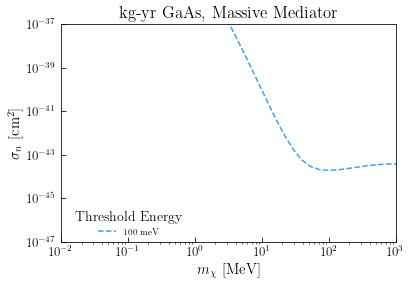

In [4]:
colors = sns.color_palette("husl", 3)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, diamond_reaches2, label='$100$ meV', color=colors[2],linestyle='--')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr GaAs, Massive Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

#xtick_major = [pow(10.,n) for n in range(-2,4,1)]
#ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
#ax.set_yticks(ytick_major)
#ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()

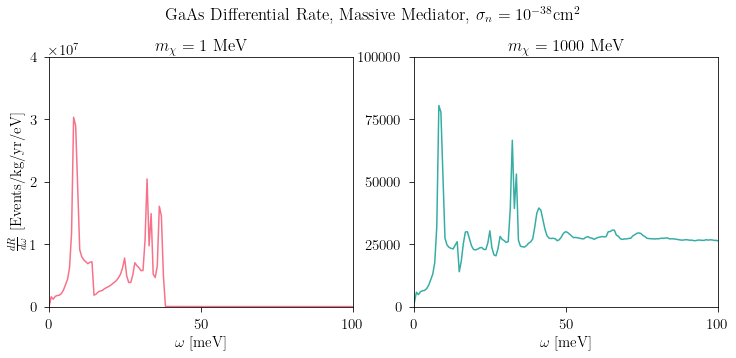

In [18]:
import seaborn as sns

mdm1 = 1e6
mdm2 = 1e9

omegarange = np.linspace(1e-4, 100e-3, 150)

dr_domega1 = [gaas.dRdomega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange]
dr_domega2 = [gaas.dRdomega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 1$ MeV')
ax2.set_title(r'$m_\chi = 1000$ MeV')

ax1.set_xlim([0,100])
ax2.set_xlim([0,100])

ax1.set_ylim([0,4e7])
ax2.set_ylim([0,1e5])


xtick_major = [50*n for n in range(3)]

ytick_major = [1e7*n for n in range(5)]

ax1.set_yticks(ytick_major)

ax1.set_xticks(xtick_major)
ax2.set_xticks(xtick_major)

ytick_major = [2.5e4*n for n in range(5)]
ax2.set_yticks(ytick_major)

plt.suptitle(r'GaAs Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.savefig(plotdir+"gaas_massive_rates_2.pdf",bbox_inches='tight')

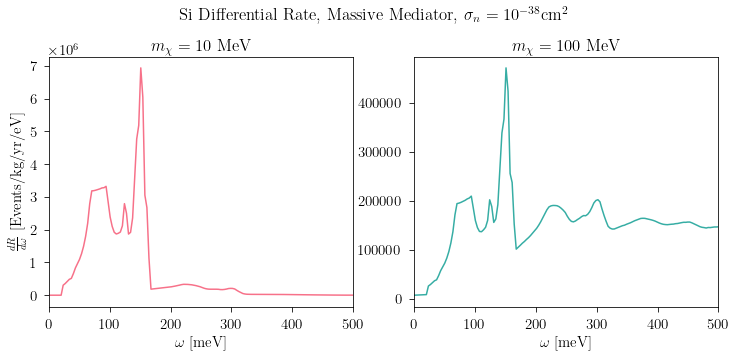

In [11]:
import seaborn as sns

mdm1 = 1e7
mdm2 = 1e8

omegarange = np.linspace(1e-4, 500e-3, 150)

dr_domega1 = [c.dRdomega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange]
dr_domega2 = [c.dRdomega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 10$ MeV')
ax2.set_title(r'$m_\chi = 100$ MeV')

ax1.set_xlim([0,500])
ax2.set_xlim([0,500])

#ax1.set_ylim([0,4e8])
#ax2.set_ylim([0,2.5e7])


#xtick_major = [50*n for n in range(5)]
#ytick_major = [1e8*n for n in range(5)]
#ax1.set_yticks(ytick_major)

#ax1.set_xticks(xtick_major)
#ax2.set_xticks(xtick_major)

#ytick_major = [0.5e7*n for n in range(6)]
#ax2.set_yticks(ytick_major)

plt.suptitle(r'Si Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.show()
#plt.savefig(plotdir+"gaas_massive_rates.pdf",bbox_inches='tight')

 .... Loading files for C
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded C_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  C_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
Points 0 to 4 took 0.06467509269714355 seconds to calculate
Points 5 to 9 took 0.132781982421875 seconds to calculate
Points 10 to 14 took 127.30408811569214 seconds to calculate
Points 15 to 19 took 299.5241153240204 seconds to calculate
Points 20 to 24 took 355.25851798057556 seconds to calculate
Points 25 to 29 took 309.41137409210205 seconds to calculate
Points 30 to 34 took 291.362370967865 seconds to calculate
Points 35 to 39 took 252.97730207443237 seconds to calculate


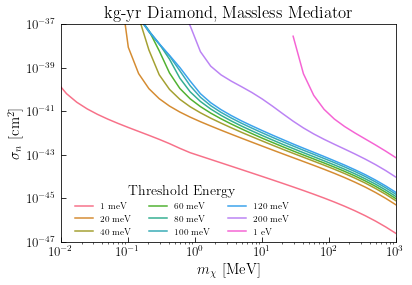

In [16]:
c = darkelf(target='C',dos_filename="C_DoS.dat")

import seaborn as sns

# Loads dark photon form factor 

points = 40

mdm = np.logspace(3, 9, points)

c_reaches1 = np.zeros(points)
c_reaches2 = np.zeros(points)
c_reaches3 = np.zeros(points)
c_reaches4 = np.zeros(points)
c_reaches5 = np.zeros(points)
c_reaches6 = np.zeros(points)
c_reaches7 = np.zeros(points)
c_reaches8 = np.zeros(points)
c_reaches9 = np.zeros(points)


import time

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    c_reaches1[i] = c.sigma_multiphonons(mass, 1e-3, mediator='massless')
    c_reaches2[i] = c.sigma_multiphonons(mass, 20e-3, mediator='massless')
    c_reaches3[i] = c.sigma_multiphonons(mass, 40e-3, mediator='massless')
    c_reaches4[i] = c.sigma_multiphonons(mass, 60e-3, mediator='massless')
    c_reaches5[i] = c.sigma_multiphonons(mass, 80e-3, mediator='massless')
    c_reaches6[i] = c.sigma_multiphonons(mass, 100e-3, mediator='massless')
    c_reaches7[i] = c.sigma_multiphonons(mass, 120e-3, mediator='massless')
    c_reaches8[i] = c.sigma_multiphonons(mass, 200e-3, mediator='massless')
    c_reaches9[i] = c.sigma_multiphonons(mass, 1000e-3, mediator='massless')


    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 9)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, c_reaches1, label='$1$ meV', color=colors[0])
ax.plot(mdm/1e6, c_reaches2, label='$20$ meV', color=colors[1],linestyle='-')
ax.plot(mdm/1e6, c_reaches3, label='$40$ meV', color=colors[2],linestyle='-')
ax.plot(mdm/1e6, c_reaches4, label='$60$ meV', color=colors[3])
ax.plot(mdm/1e6, c_reaches5, label='$80$ meV', color=colors[4],linestyle='-')
ax.plot(mdm/1e6, c_reaches6, label='$100$ meV', color=colors[5],linestyle='-')
ax.plot(mdm/1e6, c_reaches7, label='$120$ meV', color=colors[6],linestyle='-')
ax.plot(mdm/1e6, c_reaches8, label='$200$ meV', color=colors[7],linestyle='-')
ax.plot(mdm/1e6, c_reaches9, label='$1$ eV', color=colors[8],linestyle='-')


ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Diamond, Massless Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=3,title='Threshold Energy')

plt.show()

In [17]:
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_1meV.txt',
                  np.stack((mdm, c_reaches1),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_20meV.txt',
                  np.stack((mdm, c_reaches2),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_40meV.txt',
                  np.stack((mdm, c_reaches3),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_60meV.txt',
                  np.stack((mdm, c_reaches4),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_80meV.txt',
                  np.stack((mdm, c_reaches5),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_100meV.txt',
                  np.stack((mdm, c_reaches6),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_120meV.txt',
                  np.stack((mdm, c_reaches7),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_200meV.txt',
                  np.stack((mdm, c_reaches8),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/c/c_reaches_massless_1eV.txt',
                  np.stack((mdm, c_reaches9),axis=0).T)


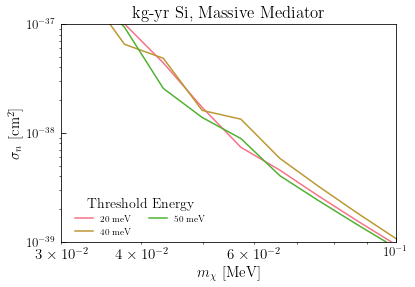

In [18]:
fig, ax = plt.subplots()

ax.plot(mdm/1e6, si_reaches1, label='$20$ meV', color=colors[0])
ax.plot(mdm/1e6, si_reaches2, label='$40$ meV', color=colors[1],linestyle='-')
ax.plot(mdm/1e6, si_reaches3, label='$50$ meV', color=colors[2],linestyle='-')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Si, Massive Mediator')

ax.set_xlim([3e-2,1e-1])
ax.set_ylim([1e-39,1e-37])

#xtick_major = [pow(10.,n) for n in range(-2,4,1)]
#ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
#ax.set_yticks(ytick_major)
#ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()

 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


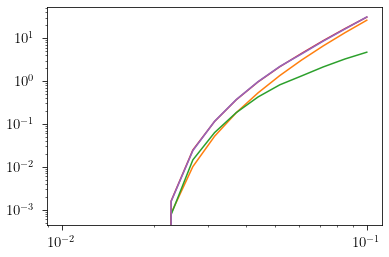

In [3]:
c = darkelf(target='Si',dos_filename="Si_DoS.dat")

omegathreshold = 50e-3

points = 15
mdm = np.logspace(4, 5, points)
rates_acoustic = np.zeros(points)
rates_optical = np.zeros(points)
rates_multiphonon = np.zeros(points)
rates_total = np.zeros(points)
rates_check = np.zeros(points)



for i, mass in enumerate(mdm):
    reduced_mass = mass*c.mp/(mass + c.mp)
    prefactor1 = ((1/(c.A*c.mp + c.A*c.mp))*(c.rhoX*c.eVcm**3)/(2*mass*(reduced_mass)**2))
    prefactor2 = 1e-38*((1/c.eVcm)**2)*(c.eVtoInvYr/c.eVtokg)

    rates_acoustic[i] = prefactor1*prefactor2*c.R_coherent_acoustic(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_optical[i] = prefactor1*prefactor2*c.R_coherent_optical(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_multiphonon[i] = c.R_multiphonons_no_single(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    rates_total[i] = rates_acoustic[i] + rates_optical[i] + rates_multiphonon[i]
    
    rates_check[i] = c.R_multiphonons(mass, omegathreshold,
                                     mediator='massive', custom_form_factor=False)
    print(i)
    
plt.plot(mdm/1e6, rates_acoustic)
plt.plot(mdm/1e6, rates_optical)
plt.plot(mdm/1e6, rates_multiphonon)
plt.plot(mdm/1e6, rates_total)
plt.plot(mdm/1e6, rates_check)

plt.xscale('log')
plt.yscale('log')
plt.show()

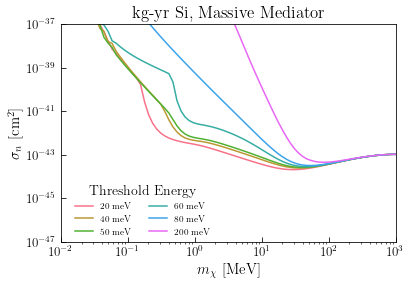

In [25]:
fig, ax = plt.subplots()

mdm = np.logspace(3, 9, 100)

ax.plot(mdm/1e6, si_reaches1, label='$20$ meV', color=colors[0])
ax.plot(mdm/1e6, si_reaches2, label='$40$ meV', color=colors[1],linestyle='-')
ax.plot(mdm/1e6, si_reaches3, label='$50$ meV', color=colors[2],linestyle='-')
ax.plot(mdm/1e6, si_reaches4, label='$60$ meV', color=colors[3])
ax.plot(mdm/1e6, si_reaches5, label='$80$ meV', color=colors[4],linestyle='-')
ax.plot(mdm/1e6, si_reaches6, label='$200$ meV', color=colors[5],linestyle='-')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Si, Massive Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.savefig("/Users/ethanvillarama/Desktop/phonon/my_plots/si_test_massive_mediator.pdf",bbox_inches='tight')


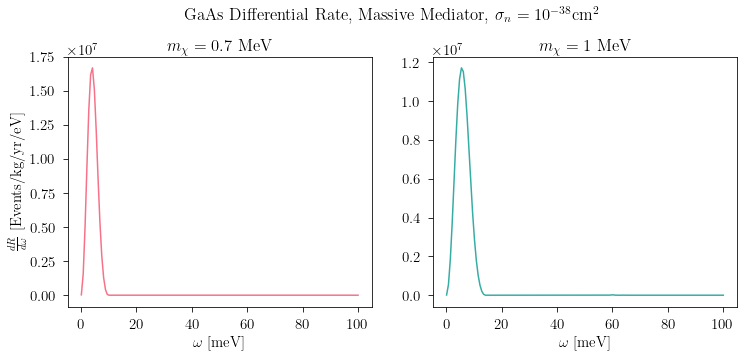

In [29]:
import seaborn as sns

mdm1 = 0.7e5
mdm2 = 1e5

omegarange = np.linspace(1e-4, 100e-3, 150)

dr_domega1 = [c.dRdomega_multiphonons(mdm1, omega, mediator='massive') for omega in omegarange]
dr_domega2 = [c.dRdomega_multiphonons(mdm2, omega, mediator='massive') for omega in omegarange]

colors = sns.color_palette("husl", 2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4.6))

ax1.plot(omegarange*1e3, dr_domega1, color=colors[0])
ax2.plot(omegarange*1e3, dr_domega2, color=colors[1])


ax1.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax2.set_xlabel(r'$\omega \ [\mathrm{meV}]$',fontsize=15)
ax1.set_ylabel(r'$\frac{dR}{d\omega} \ [\mathrm{Events}/\mathrm{kg}/\mathrm{yr}/\mathrm{eV}]$',fontsize=15)


ax1.set_title(r'$m_\chi = 0.7$ MeV')
ax2.set_title(r'$m_\chi = 1$ MeV')

plt.suptitle(r'GaAs Differential Rate, Massive Mediator, $\sigma_n = 10^{-38} \mathrm{cm}^2$', y=1.03)

plt.show()

In [33]:
rates_multiphonon

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.47503819e-04, 1.47427860e-02, 6.20173215e-02,
       1.75544028e-01, 4.08403889e-01, 7.42148323e-01, 1.34649101e+00,
       2.23560885e+00, 2.91579266e+00, 4.28562340e+00])

<ipython-input-36-2ae2ef3cb1ea>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(mdm/1e6, 3*1e-38/rates_total)


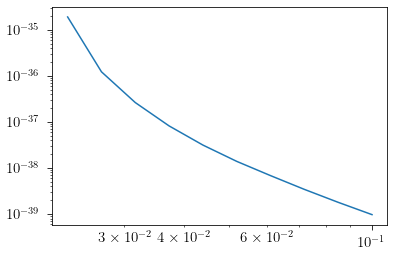

In [36]:
plt.plot(mdm/1e6, 3*1e-38/rates_total)
plt.xscale('log')
plt.yscale('log')

In [4]:
print((1/2)*1e5*(c.vesc + c.veavg)**2)
3*c.LOvec[0]

0.30464358534748076


0.18

 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 
Points 0 to 4 took 0.0576322078704834 seconds to calculate
Points 5 to 9 took 0.5726609230041504 seconds to calculate
Points 10 to 14 took 71.47640872001648 seconds to calculate
Points 15 to 19 took 51.95505976676941 seconds to calculate
Points 20 to 24 took 51.58677101135254 seconds to calculate
Points 25 to 29 took 48.014899015426636 seconds to calculate
Points 30 to 34 took 55.01639127731323 seconds to calculate
Points 35 to 39 took 44.470128297805786 seconds to calculate


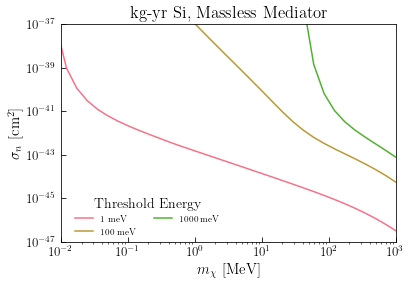

In [12]:
si = darkelf(target='Si',dos_filename="Si_DoS.dat")

import seaborn as sns

# Loads dark photon form factor 

points = 40

mdm = np.logspace(3, 9, points)

si_reaches1 = np.zeros(points)
si_reaches2 = np.zeros(points)
si_reaches3 = np.zeros(points)
si_reaches4 = np.zeros(points)
si_reaches5 = np.zeros(points)
si_reaches6 = np.zeros(points)


import time

for i, mass in enumerate(mdm):
    if (i % 5) == 0:
        start = time.time()
    si_reaches1[i] = si.sigma_multiphonons(mass, 1e-3, mediator='massless')
    si_reaches2[i] = si.sigma_multiphonons(mass, 100e-3, mediator='massless')
    si_reaches3[i] = si.sigma_multiphonons(mass, 1000e-3, mediator='massless')
    #si_reaches4[i] = si.sigma_multiphonons(mass, 55e-3, mediator='massless')
    #si_reaches5[i] = si.sigma_multiphonons(mass, 80e-3, mediator='massless')
    #si_reaches6[i] = si.sigma_multiphonons(mass, 200e-3, mediator='massless')

    if (i % 5) == 4:
        end = time.time()
        print(f'Points {i - 4} to {i} took {end - start} seconds to calculate')
        # Just to check that everything is still working
        
colors = sns.color_palette("husl", 6)

fig, ax = plt.subplots()

ax.plot(mdm/1e6, si_reaches1, label='$1$ meV', color=colors[0])
ax.plot(mdm/1e6, si_reaches2, label='$100$ meV', color=colors[1],linestyle='-')
ax.plot(mdm/1e6, si_reaches3, label='$1000$ meV', color=colors[2],linestyle='-')
#ax.plot(mdm/1e6, si_reaches4, label='$55$ meV', color=colors[3])
#ax.plot(mdm/1e6, si_reaches5, label='$80$ meV', color=colors[4],linestyle='-')
#ax.plot(mdm/1e6, si_reaches6, label='$200$ meV', color=colors[5],linestyle='-')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel('$m_\chi \ [\mathrm{MeV}]$',fontsize=15)
ax.set_ylabel('$\sigma_n \ [\mathrm{cm}^2]$',fontsize=15)

ax.tick_params(axis="both",which="major",labelsize=13,direction="in",pad=5)

ax.set_title(r'kg-yr Si, Massless Mediator')

ax.set_xlim([1e-2,1e3])
ax.set_ylim([1e-47,1e-37])

xtick_major = [pow(10.,n) for n in range(-2,4,1)]
ytick_major = [pow(10.,n) for n in range(-47,-36,2)]
ax.set_yticks(ytick_major)
ax.set_xticks(xtick_major)

ax.legend(loc=(0.03,0.01),fontsize=9,frameon=False,ncol=2,title='Threshold Energy')

plt.show()

In [13]:
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/si/si_reaches_massless_1meV.txt',
                  np.stack((mdm, si_reaches1),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/si/si_reaches_massless_100meV.txt',
                  np.stack((mdm, si_reaches2),axis=0).T)
np.savetxt('/Users/ethanvillarama/Desktop/phonon/data/dark_ELF_data_v4/si/si_reaches_massless_1eV.txt',
                  np.stack((mdm, si_reaches3),axis=0).T)


In [18]:
np.array([1,2,3])*np.array([4,5,6])

array([ 4, 10, 18])

In [2]:
si = darkelf(target='Si',dos_filename="Si_DoS.dat")

si.update_params(mX = 1e6)
si.sigma_multiphonons(200e-3)

 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Warning! Form factor not loaded. Need to set form_factor_filename if needed. Otherwise defaults to massive mediator 


2.642367948279768e-33

In [3]:
3e-38/si.R_single_phonon(200e-3)

ZeroDivisionError: float division by zero

In [4]:
si.Fn_interpolations[6](300)

ValueError: A value in x_new is above the interpolation range.

In [5]:
si.DoS_interp(300)

array(0.)

In [2]:
# Loads dark photon form factor 
si = darkelf(target='Si',dos_filename="Si_DoS.dat",
             form_factor_filename='Si_atomic_Z_eps_form_factor.dat')



 .... Loading files for Si
Warning! Epsilon grid in electron regime does not exist.
Warning! eps for phonon frequencies not loaded. Need to set phonon_filename 
Loaded Si_DoS.dat for density of states
Loaded Fn(omega) functions corresponding to density of states in:  Si_DoS.dat
Loaded Si_atomic_Z_eps_form_factor.dat for form factor


array(20000.)